In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv('tp1-ataques.csv')

# Formatear la columna paises para que cada palabra empiece en mayúscula
df['Country'] = df['Country'].str.title()

df.to_csv('tp1-ataques.csv', index=False)


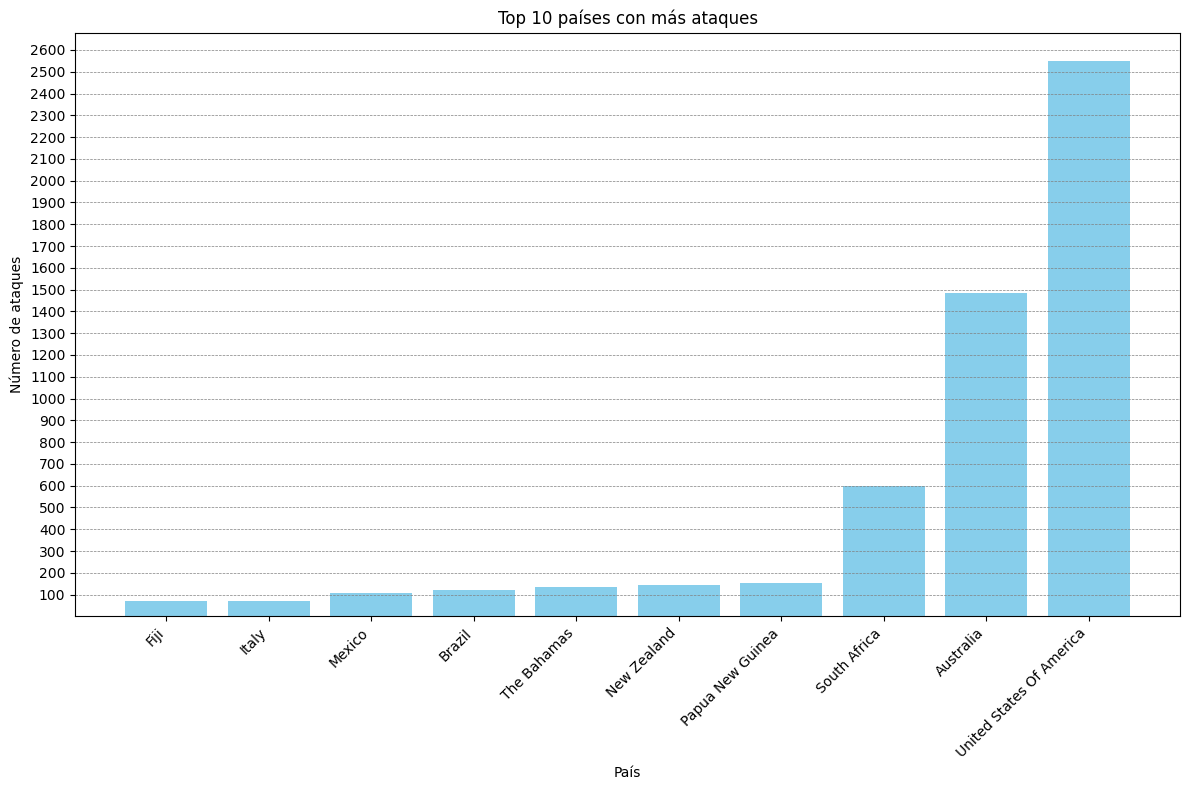

In [33]:
### ATAQUES POR PAÍS

# Contar cantidad de ataques por país
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attacks']

# Tabla de ataques por país
country_counts.to_csv('ataques_por_país.csv')

# Top 10 países con más ataques
country_attacks = country_counts.nlargest(10, 'Attacks').sort_values(by='Attacks', ascending=True)

plt.figure(figsize=(12, 8))
plt.bar(country_attacks['Country'], country_attacks['Attacks'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.yticks([n for n in range(100, 2601, 100)])
plt.xlabel('País')
plt.ylabel('Número de ataques')
plt.title('Top 10 países con más ataques')

for y in range(100, 2601, 100):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

plt.savefig('ataques_por_pais.png', format='png', bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

In [26]:
### TIPOS DE ATAQUE POR PAIS
country_type_counts = df.groupby(['Country', 'Type']).size().reset_index(name='Attacks')
country_type_counts.to_csv('ataques_por_pais_y_tipo.csv', index=False)

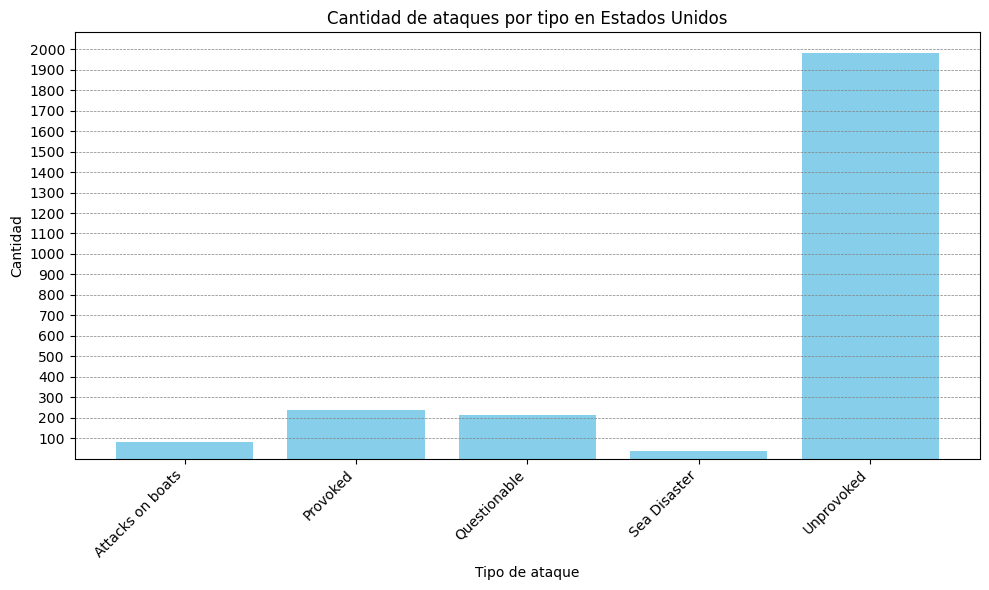

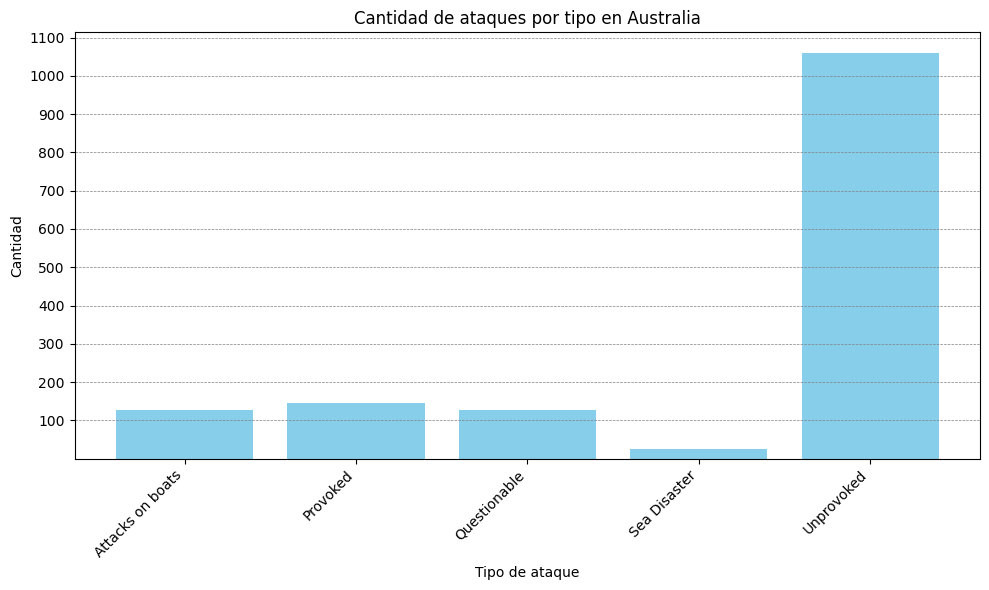

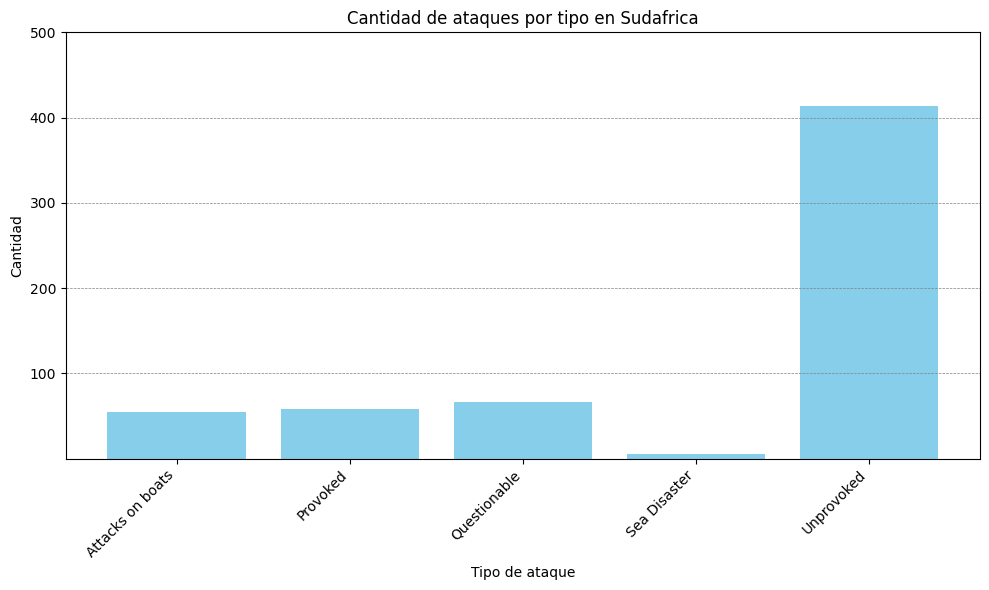

In [32]:
### TIPOS DE ATAQUE POR PAIS
ataques_por_pais_y_tipo = pd.read_csv('ataques_por_pais_y_tipo.csv')

ataques_usa = ataques_por_pais_y_tipo[ataques_por_pais_y_tipo['Country'] == "United States Of America"]
ataques_australia = ataques_por_pais_y_tipo[ataques_por_pais_y_tipo['Country'] == "Australia"]
ataques_sudafrica = ataques_por_pais_y_tipo[ataques_por_pais_y_tipo['Country'] == "South Africa"]

dicc = {
    'Estados Unidos': ataques_usa,
    'Australia': ataques_australia,
    'Sudafrica': ataques_sudafrica
}

for pais, data in dicc.items():
    max_attacks = data['Attacks'].max()
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.bar(data['Type'], data['Attacks'], color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.yticks([n for n in range(100, max_attacks + 101, 100)])
    plt.xlabel('Tipo de ataque')
    plt.ylabel('Cantidad')
    plt.title('Cantidad de ataques por tipo en ' + pais)
    
    for y in range(100, max_attacks + 101, 100):
        plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    plt.savefig(pais + '_ataques_por_tipo.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

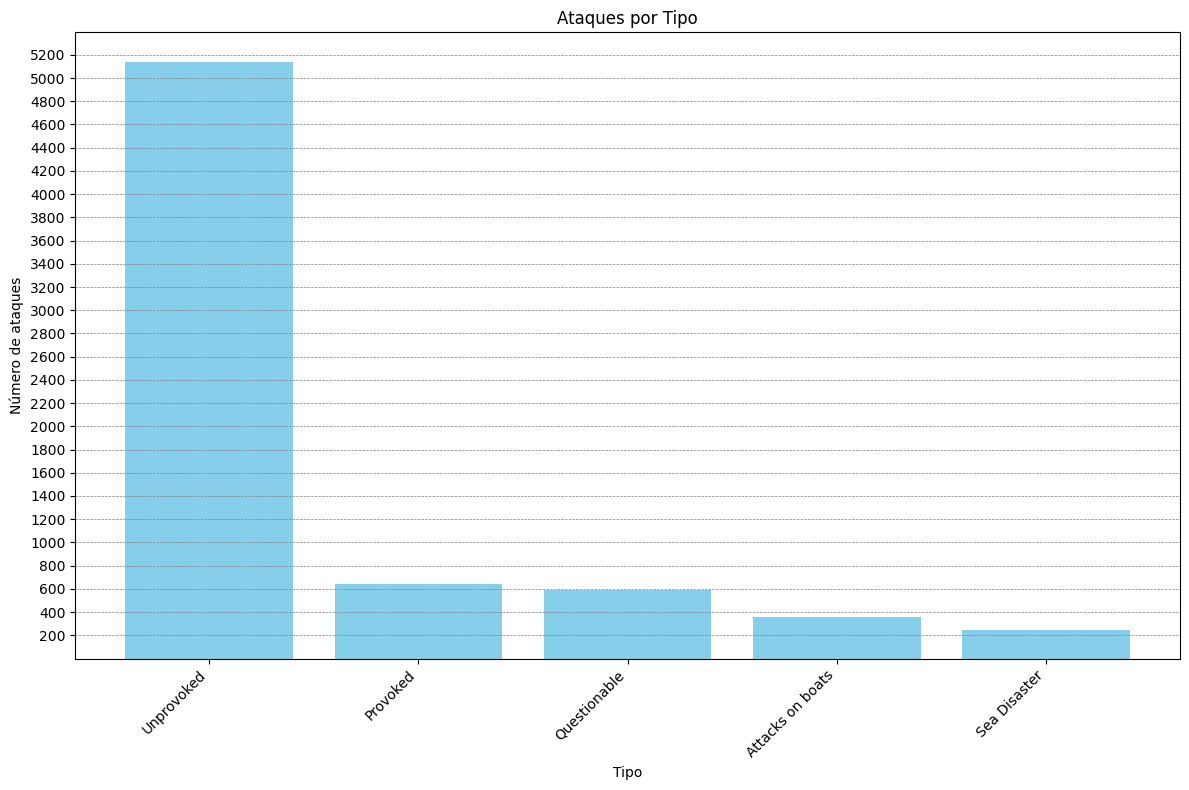

In [34]:
### ATAQUES POR TIPO

# Contar cantidad de ataques por tipo
type_counts = df['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Attacks']

attacks_by_type = type_counts.sort_values(by='Attacks')

plt.figure(figsize=(12, 8))
plt.bar(type_counts['Type'], type_counts['Attacks'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.yticks([n for n in range(200, 5201, 200)])
plt.xlabel('Tipo')
plt.ylabel('Número de ataques')
plt.title('Ataques por Tipo')

max_attacks = attacks_by_type['Attacks'].max()
for y in range(200, 5201, 200):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

plt.savefig('ataques_por_tipo.png', format='png', bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

In [ ]:
### ATAQUES POR SEXO

# Count cantidad de ataques por sexo
sex_counts = df['Sex'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribución de ataques por sexo')

plt.savefig('ataques_por_sexo.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

In [16]:
### Agregar código a los paises
countries_df = pd.read_csv('ataques_por_país.csv')
country_codes_df = pd.read_csv('country_codes.csv')

# Rename the 'Alpha-3 code' column for easier merging
country_codes_df = country_codes_df.rename(columns={'Alpha-3 code': 'iso_a3'})

# Convert both Country columns to lowercase for case-insensitive matching
countries_df['Country_lower'] = countries_df['Country'].str.lower()
country_codes_df['Country_lower'] = country_codes_df['Country'].str.lower()

# Define a function to find partial matches
def find_iso_a3(country_name):
    # Filter the country_codes_df for names containing the country_name
    match = country_codes_df[country_codes_df['Country_lower'].str.contains(country_name)]
    # If a match is found, return the first match's iso_a3 code
    return match['iso_a3'].values[0] if not match.empty else None

# Apply the function to the Country column in countries_df to get ISO A3 codes
countries_df['iso_a3'] = countries_df['Country_lower'].apply(find_iso_a3)

# Drop the auxiliary 'Country_lower' column after merging
countries_df = countries_df.drop(columns=['Country_lower'])

# Save the updated DataFrame to a new CSV (optional)
countries_df.to_csv('paises_con_codigo.csv', index=False)

<ipython-input-16-665edf067ba3>:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  match = country_codes_df[country_codes_df['Country_lower'].str.contains(country_name)]


<ipython-input-18-80fd031eef47>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


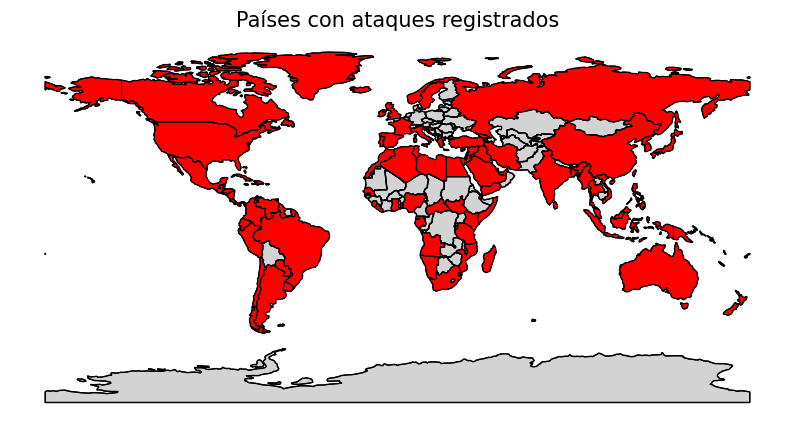

In [18]:
### Mapa de ataques
paises_con_codigo = pd.read_csv('paises_con_codigo.csv')
codigos = paises_con_codigo['iso_a3'].replace('"', '').unique()

# Cargar mapa y agregar países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['In_Dataset'] = world['iso_a3'].isin(codigos)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.boundary.plot(ax=ax, linewidth=0.8, color="black")
world.plot(ax=ax, color='lightgrey', edgecolor="black")
world[world['In_Dataset']].plot(ax=ax, color='red', edgecolor="black", linewidth=0.5)

ax.set_title("Países con ataques registrados", fontsize=15)
ax.axis('off')

plt.savefig('mapa_ataques_por_pais.png', format='png', bbox_inches='tight', dpi=300)
plt.show()